In [21]:
import pandas as pd

In [22]:
data = pd.read_csv("milwaukee_traffic_accidents.csv")

In [23]:
data.head()

,CASENUMBER,CASEDATE,ACCIDENTLOC
0,J9L074SFDC,2019-05-07 19:30:00,1721 W CANAL ST
1,J9L0778HPS,2019-05-07 13:30:00,000010001000000
2,J9L03RKDKN,2019-05-07 09:03:00,N 30TH ST & W CHERRY ST
3,J9L0MB7DH4,2019-05-06 21:02:00,N 58TH ST & W PHILIP PL
4,J9L0MB7DH3,2019-05-06 20:18:00,000010001001000


In [24]:
loc = data['ACCIDENTLOC'].values

In [25]:
len(loc)

145591

In [26]:
# Remove the dirty data where the accidents location is digital sequence
cleaned_loc = []
dirty_loc = []
for i in range(len(loc)):
    if str(loc[i]).isdigit() == False:
        cleaned_loc.append(loc[i])
    else:
        dirty_loc.append(loc[i])
print("Length of cleaned data is: ", len(cleaned_loc))
print("Length of dirty data is: ", len(dirty_loc))

Length of cleaned data is:  143195
Length of dirty data is:  2396


In [27]:
cleaned_loc

['1721 W CANAL ST',
 'N 30TH ST & W CHERRY ST',
 'N 58TH ST & W PHILIP PL',
 '5058 N 39TH ST',
 'N 35TH ST & W EGGERT PL',
 'N 60TH ST & W CHAMBERS ST',
 'S 13TH ST & W ROGERS ST',
 '145 N HAWLEY RD',
 'S 1ST ST & W MAPLE ST',
 '2300 N 24TH ST',
 '5876 N 61ST ST',
 'N 30TH ST & W CENTER ST',
 'S 31ST ST & W MITCHELL ST',
 '9301 W BROWN DEER RD',
 'N 50TH ST & W CENTER ST',
 'N 60TH ST & W CONGRESS ST',
 'N 46TH ST & W BURLEIGH ST',
 'N 22ND ST & W WELLS ST',
 'N DOUSMAN ST & E LOCUST ST',
 'N 38TH ST & W MICHIGAN ST',
 'N 8TH ST & W LOCUST ST',
 '2650 S 27TH ST',
 '4680 N 19TH PL',
 'S 37TH ST & W MITCHELL ST',
 'N 56TH ST & W CLARKE ST',
 '3625 N 37TH ST',
 'N 32ND ST & W WALNUT ST',
 'N 37TH ST & W BURLEIGH ST',
 'N 37TH ST & W BURLEIGH ST',
 '3531 N 23RD ST',
 'N 2ND ST & W CLARKE ST',
 'N 38TH CT & W GREEN TREE RD',
 'S 2ND ST & W FLORIDA ST',
 'N 103RD ST & W SILVER SPRING DR',
 'N 5TH ST & W CENTER ST',
 '5107 N 65TH ST',
 'N BROADWAY & E MASON ST',
 'N 4TH ST & W LOCUST ST',
 'N

In [28]:
# remove nan value
counter = 0
cleaned_loc2 = []
for item in cleaned_loc:
    if isinstance(item, float) == False:
        cleaned_loc2.append(item)
    else:
        counter += 1
counter

764

In [29]:
cleaned_loc2

['1721 W CANAL ST',
 'N 30TH ST & W CHERRY ST',
 'N 58TH ST & W PHILIP PL',
 '5058 N 39TH ST',
 'N 35TH ST & W EGGERT PL',
 'N 60TH ST & W CHAMBERS ST',
 'S 13TH ST & W ROGERS ST',
 '145 N HAWLEY RD',
 'S 1ST ST & W MAPLE ST',
 '2300 N 24TH ST',
 '5876 N 61ST ST',
 'N 30TH ST & W CENTER ST',
 'S 31ST ST & W MITCHELL ST',
 '9301 W BROWN DEER RD',
 'N 50TH ST & W CENTER ST',
 'N 60TH ST & W CONGRESS ST',
 'N 46TH ST & W BURLEIGH ST',
 'N 22ND ST & W WELLS ST',
 'N DOUSMAN ST & E LOCUST ST',
 'N 38TH ST & W MICHIGAN ST',
 'N 8TH ST & W LOCUST ST',
 '2650 S 27TH ST',
 '4680 N 19TH PL',
 'S 37TH ST & W MITCHELL ST',
 'N 56TH ST & W CLARKE ST',
 '3625 N 37TH ST',
 'N 32ND ST & W WALNUT ST',
 'N 37TH ST & W BURLEIGH ST',
 'N 37TH ST & W BURLEIGH ST',
 '3531 N 23RD ST',
 'N 2ND ST & W CLARKE ST',
 'N 38TH CT & W GREEN TREE RD',
 'S 2ND ST & W FLORIDA ST',
 'N 103RD ST & W SILVER SPRING DR',
 'N 5TH ST & W CENTER ST',
 '5107 N 65TH ST',
 'N BROADWAY & E MASON ST',
 'N 4TH ST & W LOCUST ST',
 'N

In [30]:
from geopy.geocoders import Nominatim

In [31]:
geolocator = Nominatim(user_agent = 'google')

In [32]:
a = geolocator.geocode('N 30TH ST MILWAUKEE WI', 'W CHERRY ST MILWAUKEE WI')

In [33]:
print(a.latitude, a.longitude)

43.0733961 -87.9510258


In [34]:
latitude_longitude = []
counter = 0
for j in range(len(cleaned_loc2[:3000])):
    try:
        st = cleaned_loc2[j].split('&')
        if len(st) == 1:
            location = geolocator.geocode(cleaned_loc2[j])
            latitude_longitude.append([location.latitude, location.longitude])
        else:
            location = geolocator.geocode(st[0], st[1])
            latitude_longitude.append([location.latitude, location.longitude])
    except:
        #counter += 1
        print(cleaned_loc2[j])

Near 2650 N 27TH ST
Near 3463 S 13TH ST
Near 1750 E LOCUST ST
N RICHARDS ST & E TOWNSEND ST
Near 324 E STATE ST
Near 431 N 44TH ST
Near 2630 W CLYBOURN ST
Near 1412 E BRADY ST
Near 1870 E LAFAYETTE PL
Near 4150 N 62ND ST
Near 1327 S 33RD ST
Near 3202 N 35TH ST
Near 450 N JACKSON ST
Near 600 N HAWLEY RD
Near 5921 W CONGRESS ST
Near 3562 S 43RD ST
Near 11413 W SILVER SPRING DR
Near 7101 W NASH ST
Near 2218 N 54TH ST
Near 5526 N 56TH ST
Near 913 N 35TH ST
Near 2316 S 13TH ST
Address not entered
W NORTH AVE  at N 15TH ST
W LISBON AVE  at N WALTON PL
E WISCONSIN AVE  at N JEFFERSON ST
W MORGAN AVE  at S 13TH ST
S 63RD ST at W MORGAN AVE
N DR M L KING JR DR at W CENTER ST
S LOUISIANA AVE  at W BOLIVAR AVE
W GLENDALE AVE  at N HOPKINS ST
5625 W SILVER SPRING DR - W SILVER SPRING DR at N 40TH ST (1)
N 51ST BLVD  at W HAMPTON AVE
S 27TH ST at W HOWARD AVE 241
W of N 28TH ST at W CONGRESS ST (1)
W GRANGE AVE  at S 20TH ST
HUMBOLDT PARK RD (1) at E OKLAHOMA AVE
E TOWNSEND ST at N HUMBOLDT BLVD
Hi

Highway 241 - W MORGAN AVE at S 27TH ST
Address not entered
N 6TH ST & W VINE ST - 166 Feet N of N 6TH ST & W VINE ST on W VINE ST
Highway EE - 100
S 32ND ST & W BURNHAM ST - 72 Feet E of S 32ND ST & W BURNHAM ST on S 32ND ST
5729 N 58TH ST
N 88TH ST at W CONGRESS ST (1)
N 27TH ST & W VLIET ST - 104 Feet N of N 27TH ST & W VLIET ST on W VLIET ST
W VIENNA AVE  at N 37TH ST
N 45TH ST & W VLIET ST - 10 Feet E of N 45TH ST & W VLIET ST on N 45TH ST
N HUMBOLDT BLVD  at E NORTH AVE
N 84TH ST & W MILL RD
3012 S SUPERIOR ST
N 26TH ST at W NORTH AVE
4931 N 49TH ST -
W CODY CIR  at W ACACIA ST
W LINCOLN AVE  at S 9TH PL
1221 N 12TH ST - N 12TH ST at W ATKINSON AVE
Highway 145 - N 29TH ST at W FOND DU LAC AVE
Address not entered
W NATIONAL AVE at S 35TH ST 059
LAYTON BLVD at W ORCHARD ST
N 36TH ST & W SILVER SPRING DR
N 7TH ST & W WALNUT ST - 136 Feet S of N 7TH ST & W WALNUT ST on W WALNUT ST
S 15TH PL at W OHIO AVE
S 38TH ST at W LINCOLN AVE
S HOWELL AVE  at E MORGAN AVE
E CENTER ST & N HOLTON 

E HARTFORD AVE  at N DOWNER AVE
N 35TH ST & W WRIGHT ST
605 E LYON ST
W HOWARD AVE SERVICE DR at S 20TH ST
Address not entered
N JACKSON ST & E MICHIGAN ST
N BUFFUM ST & E LOCUST ST
W EUCLID AVE (1)  at S 16TH ST (1)
N 68TH ST & W MARION ST
N 29TH ST & W CLARKE ST
Address not entered
N 57TH ST & W LOCUST ST
N MARYLAND AVE  at E NEWBERRY BLVD
S 6TH ST at W HOLT AVE
2142 W GRANT ST - W GRANT ST at S MUSKEGO AVE
N 11TH ST & W FINN PL - 92 Feet S of N 11TH ST & W FINN PL on W FINN PL
N 87TH ST at W THURSTON AVE
E BOLIVAR AVE  at S GRIFFIN AVE (1)
N 107TH ST & W BROWN DEER PL
N 91ST ST & W SILVER SPRING DR
N 47TH ST & W LOCUST ST
1555 N RIVERCENTER DR
N 91ST ST & W SILVER SPRING DR
819 N WATER ST
N 60TH ST & W SILVER SPRING DR
Highway 241 - W CLEVELAND AVE at S 27TH ST
N 70TH ST & W CLOVERNOOK ST - 205 Feet E of N 70TH ST & W CLOVERNOOK ST on N 70TH ST
Highway EE - N 84TH ST at W HAMPTON AVE
2934 S 35TH ST
1320 W BURNHAM ST
S of
5229 N 52ND ST - Highway 145 - N 52ND ST at W FOND DU LAC AVE


S 33RD ST at W GREENFIELD AVE
N 7TH ST at W KEEFE AVE
N 51ST ST at W WASHINGTON BLVD
W VIENNA AVE  at N 77TH ST
N 86TH ST & W GOOD HOPE RD - 7 Feet S of N 86TH ST & W GOOD HOPE RD on W GOOD HOPE RD
Address not entered
W LINCOLN AVE  at S 9TH PL
N 60TH ST & W MELVINA ST
W CARMEN AVE  at N 78TH ST
S 37TH ST & W BURNHAM ST - 146 Feet N of S 37TH ST & W BURNHAM ST on W BURNHAM ST
Highway NN - S 76TH ST at W OKLAHOMA AVE
N 40TH ST (1)  at W LISBON AVE
N of W HARRISON AVE  at S 6TH ST
W GREENFIELD AVE  at LAYTON BLVD
2218 W GRANT ST -
Highway 145 - N 12TH ST at W FOND DU LAC AVE
N 24TH ST at W WISCONSIN AVE
N 44TH ST at W HAMPTON AVE
N 43RD ST & W SILVER SPRING DR
N 31ST ST at W WISCONSIN AVE
Address not entered
S 6TH ST at W LAYTON AVE
N HOLTON ST at E NORTH AVE
N 4TH ST & W MICHIGAN ST
N 32ND ST at W CANAL ST (1)
Address not entered
S 86TH ST & W ADLER ST - 96 Feet E of S 86TH ST & W ADLER ST on S 86TH ST
Address not entered
W LISBON AVE  at N 84TH ST
N OAKLAND AVE  at E LOCUST ST
N 32ND S

Highway 145 - W ARMITAGE AVE at W FOND DU LAC AVE
2926 N 30TH ST
N 27TH ST & W BURLEIGH ST
W HAMPTON AVE  at N TEUTONIA AVE
S 68TH ST at W MORGAN AVE
Highway 145 - N 51ST BLVD at W FOND DU LAC AVE
S of W HEATHER AVE  at N 107TH ST
N 37TH ST & W CENTER ST - 318 Feet N of N 37TH ST & W CENTER ST on W CENTER ST
S 2ND ST & W VIRGINIA ST
N 4TH ST at W KILBOURN AVE
W CLEVELAND AVE  at S 6TH ST
N 61ST ST & W CHAMBERS ST
N 60TH ST & W BENDER CT - 94 Feet N of N 60TH ST & W BENDER CT on W BENDER CT
2117 W BECHER ST
S 26TH ST at W MORGAN AVE
Address not entered
N of E MEINECKE AVE  at N HOLTON ST
N of E MEINECKE AVE  at N HOLTON ST
W GRANGE AVE  at S 13TH ST
E of S MUSKEGO AVE  at W ARROW ST
W ARTHUR AVE  at S 6TH ST
E of S 14TH ST at W GREENFIELD AVE
500 N WATER ST
S 11TH ST & W BURNHAM ST
N 6TH ST at W WISCONSIN AVE
S 35TH ST & W BECHER ST - 83 Feet W of S 35TH ST & W BECHER ST on S 35TH ST
Highway 32 - E ALBION ST at N PROSPECT AVE
Highway 32 - E ALBION ST at N PROSPECT AVE
Address not entere

S 16TH ST (1)  at W CLEVELAND AVE
W NORTH AVE  at N 46TH ST
N 33RD ST & W WRIGHT ST
4715 N 48TH ST - W of
N 6TH ST at W GARFIELD AVE
Highway 181 - W RUBY AVE at N 76TH ST
N BOOTH ST & E CENTER ST - 161 Feet W of N BOOTH ST & E CENTER ST on N BOOTH ST
S 43RD ST at W MORGAN AVE
W LAPHAM ST at LAYTON BLVD
Address not entered
W VILLARD AVE  at PRIVATE PROPERTY
W FOND DU LAC AVE  at W SILVER SPRING DR
E WISCONSIN AVE  at N WATER ST
W HAMPTON AVE  at N HOPKINS ST
N 40TH ST (1)  at W LISBON AVE
Highway 145 - N 34TH ST at W FOND DU LAC AVE
Address not entered
401 S 1ST ST - S 1ST ST at W LAYTON AVE
N HOLTON ST at E NORTH AVE
N 17TH ST & W CLYBOURN ST - 378 Feet N of N 17TH ST & W CLYBOURN ST on W CLYBOURN ST
6505 N 66TH ST -
N 25TH ST (1)  at W LISBON AVE
N 11TH ST & W CENTER ST - 41 Feet E of N 11TH ST & W CENTER ST on N 11TH ST
5506 W SILVER SPRING DR - W SILVER SPRING DR at SHERMAN CONNECTOR RDS
S 30TH ST at W LINCOLN AVE
S 97TH ST & W EDEN PL - 92 Feet S of S 97TH ST & W EDEN PL on W EDEN 

S 15TH ST & W WASHINGTON ST - 28 Feet W of S 15TH ST & W WASHINGTON ST on S 15TH ST
E of S 84TH ST at W MORGAN AVE
N of W NORTH AVE  at N 45TH ST
N 84TH ST at W HAMPTON AVE
N BROADWAY & N WATER ST - 120 Feet W of N BROADWAY & N WATER ST on N BROADWAY
Highway 145 - N 27TH ST at W FOND DU LAC AVE
N 6TH ST & W BROWN ST
Address not entered
N 2ND ST & W CLYBOURN ST - 58 Feet E of N 2ND ST & W CLYBOURN ST on N 2ND ST
Highway 241 - W HOWARD AVE at S 27TH ST
1400 N 14TH ST - N 14TH ST at W NORTH AVE
Highway PP - W DENVER AVE at W GOOD HOPE RD
N 16TH ST at W NORTH AVE
W NATIONAL AVE at S 20TH ST 059
2709 N 28TH ST
N CASS ST & E MICHIGAN ST - 90 Feet N of N CASS ST & E MICHIGAN ST on E MICHIGAN ST
N 44TH ST & W CENTER ST - 97 Feet E of N 44TH ST & W CENTER ST on N 44TH ST
Address not entered
N of W NATIONAL AVE at S 25TH ST 059
S 29TH ST at W OKLAHOMA AVE
N 31ST ST & W WELLS ST - 120 Feet E of N 31ST ST & W WELLS ST on N 31ST ST
S 72ND ST & W MAIN ST - 21 Feet W of S 72ND ST & W MAIN ST on S 72N

N 91ST ST & W GOOD HOPE RD - 104 Feet E of N 91ST ST & W GOOD HOPE RD on N 91ST ST
N 28TH ST & W BURLEIGH ST
6042 W SILVER SPRING DR
W KEEFE AVE  at N 39TH ST
S 11TH ST & W BURNHAM ST
E EDGEWOOD AVE  at N OAKLAND AVE
N JACKSON ST at E WISCONSIN AVE
Highway 145 - N 36TH ST at W FOND DU LAC AVE
E MELVINA ST & N PALMER ST
Address not entered
Address not entered
Highway 32 - E ALBION ST at N PROSPECT AVE
N 85TH ST & W BROWN DEER RD
3604 N 85TH ST
2517 N 26TH ST -
W ADLER ST & S HAWLEY RD - 153 Feet S of W ADLER ST & S HAWLEY RD on W ADLER ST
N 38TH ST at W CONCORDIA AVE
N of
N 14TH ST & W CORNELL ST - 333 Feet W of N 14TH ST & W CORNELL ST on N 14TH ST
S 13TH ST & W ORCHARD ST - 163 Feet S of S 13TH ST & W ORCHARD ST on W ORCHARD ST
W of
Address not entered
N 51ST ST & W CHAMBERS ST
W HAMPTON AVE  at N 41ST ST
N 25TH ST (1)  at W CANAL ST (1)
S 15TH ST & W BECHER ST
S 7TH ST at W LINCOLN AVE
W SUMAC PL at W KINNICKINNIC RIVER PKWY (1)
E LOCUST ST at N OAKLAND AVE
N SHERMAN BLVD  at W HAMPT

S 32ND ST & W RUSKIN ST
W THURSTON AVE  at N 41ST ST
W AUER AVE  at N 52ND ST
1320 W BURNHAM ST
W MOTHER DANIELS WAY  at PRIVATE PROPERTY
N of W MEINECKE AVE  at N 9TH ST
N PROSPECT AVE at E BRADY ST 032
Highway EE - N 77TH ST at W HAMPTON AVE


In [35]:
latitude, longitude = [], []
for i in range(len(latitude_longitude)):
    latitude.append(latitude_longitude[i][0])
    longitude.append(latitude_longitude[i][1])

In [36]:
from mpl_toolkits.basemap import Basemap
import numpy as np

In [37]:
print("Minimum of Latitude", min(latitude))
print("Maximum of Latitude", max(latitude))
print("Minimum of Longitude", min(longitude))
print("Maximum of Latitude", max(longitude))

Minimum of Latitude -26.1653862
Maximum of Latitude 64.5731537
Minimum of Longitude -122.921663707625
Maximum of Latitude 34.5731341


In [38]:
longitude[:10]

[-77.4465265,
 -116.2280897,
 -75.2367888,
 -82.4163318604651,
 -112.0075056,
 -87.9875562,
 -98.1285124,
 -87.985460417882,
 -101.3060338,
 -75.172015]

In [39]:
latitude[:10]

[37.5415941,
 43.6222826,
 39.9615986,
 27.991820372093,
 33.6657159,
 43.0529928,
 26.173183,
 43.0317162712523,
 32.29533,
 39.990866]

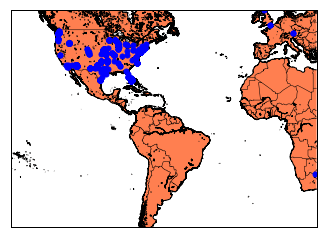

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 37, lon_0 = -77,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-150, llcrnrlat=-50,
    urcrnrlon=27, urcrnrlat=56)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
#lons = [-135.3318, -134.8331, -134.6572]
#lats = [57.0799, 57.0894, 56.2399]
x,y = map(longitude, latitude)
map.plot(x, y, 'bo', markersize=5)
 
plt.show()

### It is accomplished, the first 10000 accidents in Milwaukee showed.